# 3-dimensional linear system example

In [1]:
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np, matplotlib.pyplot as plt
from delayed_linear_system import *
from bio_ofc import *

### Environment definition

In [2]:
env = delayed_linear_system(A=np.array([[1, .3, 0.2], [0, 1, 0], [.2, 0, 0.3]]),
                            B=np.array([[0, 0.2], [1, 0.1], [0.4, 0.7]]),
                            C=np.array([[1, 0, 0], [0, -1, 0.1], [.5, .5, 0.3]]),
                            V=.01 * np.eye(3),
                            W=np.array([[.04, .09, 0], [.09, .25, 0], [0, 0, .04]]),
                            Q=np.array([[1, 0, 0], [0, 0, 0.1], [0.1, 0.3, 0.1]]),
                            R=np.eye(2),
                            delay = 3)

### Training

In [3]:
ABCKL, (cost_hist, ll_hist, ep_len_hist, ABCKL_hist)  = bio_ofc_train(env_fn = lambda: env,
                                                        internal_dim = 4,
                                                        seed=0,
                                                        max_ep_len=20,
                                                        episodes=3000,
                                                        sid_lr=1e-4,
                                                        pi_lr=2e-7)

100%|██████████| 3000/3000 [00:11<00:00, 255.25it/s, cost=0.531, ep_len=25, pi_lr=2e-07, sid_err=0.854, sid_lr=0.0001]


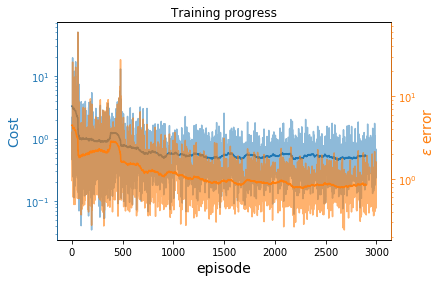

In [4]:
fig, ax = plt.subplots(figsize=(6,4))
colors = ['tab:blue','tab:orange']; fs = 14;
ch = np.array(cost_hist)
ax.semilogy(ch, alpha = 0.5);
ax.semilogy([ch[-100+i:i].mean() for i in range(100,len(ch))], color = colors[0]);
ax.set_ylabel('Cost',fontsize=fs, color=colors[0]);
ax.tick_params(axis='y', colors=colors[0], which='both')
ax2 = ax.twinx()
llh = np.array(ll_hist)
ax2.semilogy(llh, color=colors[1], alpha=0.6);
ax2.semilogy([llh[-100+i:i].mean() for i in range(100,len(llh))], color = colors[1]);
ax2.set_ylabel('$\epsilon$ error',fontsize=fs, color=colors[1]);
ax2.tick_params(axis='y', colors=colors[1], which='both')
ax2.spines['left'].set_color(colors[0])
ax2.spines['right'].set_color(colors[1])
ax.set_title('Training progress')
ax.set_xlabel('episode',fontsize=fs);

### Evaluation

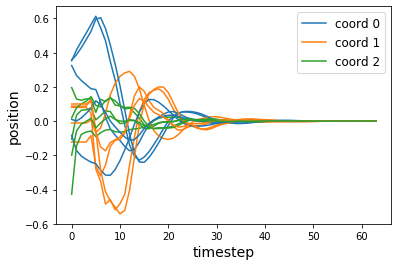

In [5]:
# Visualizing the evolution of the different system coordinates
# This can be plotted in the absent of noise to see convergence clearly

visualize_trajectories(env, ABCKL, ep_len = 60, episodes = 5, noisy_env = False)